In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from google.colab import drive
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
person = "Miguel"

In [4]:
df1 = pd.read_csv("/content/drive/MyDrive/4 Semestre/Project1/"+person+"_all_features.csv")
df1.head()

,label,mean_x,std_x,kurtosis_x,skew_x,mean_y,std_y,kurtosis_y,skew_y,mean_z,...,mean_freq_x,fft_energy_x,peak_freq_y,spectral_entropy_y,mean_freq_y,fft_energy_y,peak_freq_z,spectral_entropy_z,mean_freq_z,fft_energy_z
0,5.0,2.557499,1.293377,-0.999987,-0.487717,-16.010095,7.610073,-0.953773,-0.705175,2.128833,...,2.706573,4608.288143,0.0,1.398635,2.346362,178240.957660,0.0,2.170947,6.117145,4475.303540
1,5.0,-6.056320,8.432990,-0.704669,-0.730033,-8.858947,9.819147,-0.374209,-0.671862,0.783023,...,3.306134,45139.897151,0.0,2.059461,5.231609,78848.424072,2.0,1.438719,3.731999,14646.615494
2,5.0,-2.932846,5.127624,-1.172847,0.260777,-9.667458,6.382217,-1.365210,0.140228,-1.259893,...,2.354842,13591.424483,0.0,1.278502,1.984829,71130.510787,2.0,1.848041,4.234959,3239.070683
3,5.0,1.094053,0.976997,-1.265044,-0.476306,-11.491232,3.735004,-1.330727,-0.441262,1.641208,...,2.129340,1046.324140,0.0,1.107918,1.583865,86883.112760,0.0,1.766198,3.961246,2640.503680
4,5.0,2.283141,1.668680,-0.582491,0.038275,-15.094841,4.849610,-1.573934,0.036933,0.825570,...,2.872116,4126.720178,0.0,0.928275,1.140342,149754.495580,2.0,1.820273,5.129908,7840.602154


In [5]:
y = df1.iloc[:, 0] #The first column corresponds to the class label
X = df1.iloc[:, 1:] #We use the rest to classify

In [6]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #WE evaluate with Kfold (5 folds)
scaler = StandardScaler()

# Multilayer Perceptron

In [7]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 25), activation='relu', solver='adam', max_iter=1000, random_state=42)
pipeline_mlp = make_pipeline(scaler, mlp)

y_pred_mlp = cross_val_predict(pipeline_mlp, X, y, cv=kfold)

In [8]:
print("Results for MLP!\n")
print(classification_report(y, y_pred_mlp))

accuracy5 = accuracy_score(y, y_pred_mlp)
print(f"Overall accuracy for MLP: {accuracy5:.3f}")


Results for MLP!

              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99        60
         2.0       0.91      0.80      0.85        60
         3.0       0.95      0.93      0.94        60
         4.0       0.86      0.98      0.91        60
         5.0       0.80      0.80      0.80        60
         6.0       0.79      0.77      0.78        60

    accuracy                           0.88       360
   macro avg       0.88      0.88      0.88       360
weighted avg       0.88      0.88      0.88       360

Overall accuracy for MLP: 0.881


#Hyperparameters:

hidden_layer_sizes=(50, 25): Two hidden layers with 50 and 25 neurons, respectively.

activation='relu': Activation function used in the hidden layers.

solver='adam': Optimization algorithm.

max_iter=1000: Maximum number of iterations.


We change the hidden layer sizes

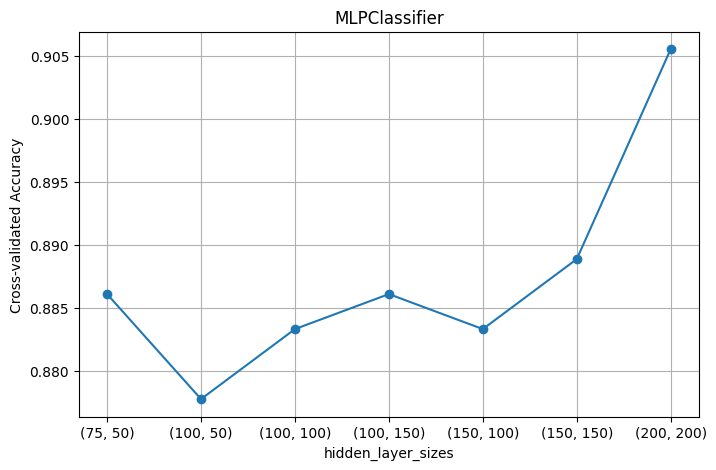

In [9]:
hidden_layers_conf = [(75,50),(100, 50), (100, 100),(100,150),(150,100),(150,150),(200,200)]
accuracy = []

for i in hidden_layers_conf:
    mlp = MLPClassifier(hidden_layer_sizes=i, activation='relu', solver='adam', max_iter=1000, random_state=42)
    pipeline_mlp = make_pipeline(scaler, mlp)
    y_pred_mlp = cross_val_predict(pipeline_mlp, X, y, cv=kfold)
    acc = accuracy_score(y, y_pred_mlp)
    accuracy.append(acc)

plt.figure(figsize=(8, 5))
plt.plot([str(cfg) for cfg in hidden_layers_conf], accuracy, marker='o')
plt.title('MLPClassifier')
plt.xlabel('hidden_layer_sizes')
plt.ylabel('Cross-validated Accuracy')
plt.grid(True)
plt.show()


# Feature Selection

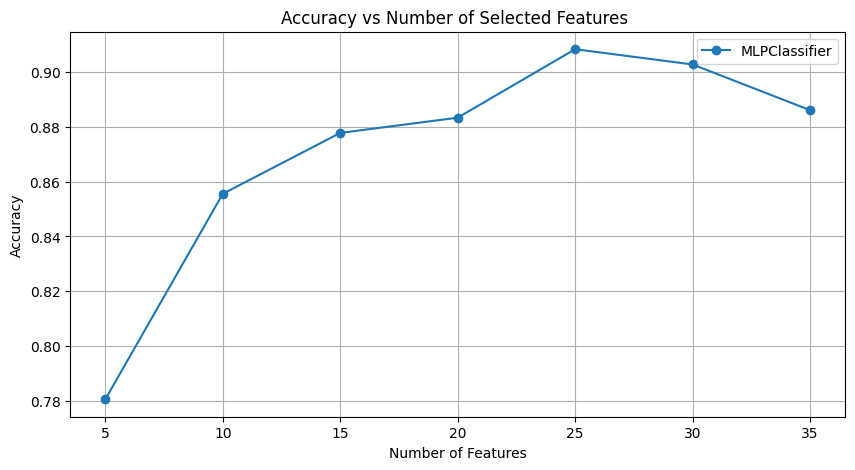

Selected features: ['mean_x', 'std_x', 'mean_y', 'std_y', 'mean_z', 'std_z', 'rms', 'median_x', 'min_x', 'max_x', 'range_x', 'median_y', 'min_y', 'max_y', 'range_y', 'median_z', 'min_z', 'max_z', 'range_z', 'spectral_entropy_x', 'mean_freq_x', 'spectral_entropy_y', 'mean_freq_y', 'spectral_entropy_z', 'mean_freq_z']


In [10]:
k = [5,10,15,20,25,30,35]
accuracy_mlp = []

for i in k:
  accuracy_fold_mlp = []
  for train_idx, test_idx in kfold.split(X, y):
        X_train = X.iloc[train_idx]
        X_test =  X.iloc[test_idx]
        y_train = y.iloc[train_idx]
        y_test = y.iloc[test_idx]

        scaler = StandardScaler()
        X_train_sc = scaler.fit_transform(X_train)
        X_test_sc = scaler.transform(X_test)

        KBEST = SelectKBest(score_func=f_classif,k=i)
        X_train_selected = KBEST.fit_transform(X_train_sc, y_train)
        X_test_selected = KBEST.transform(X_test_sc)

        mlp = MLPClassifier(hidden_layer_sizes=(200,200), max_iter=1000, random_state=42)
        mlp.fit(X_train_selected, y_train)
        accuracy_fold_mlp.append(mlp.score(X_test_selected, y_test))
  accuracy_mlp.append(np.mean(accuracy_fold_mlp))

plt.figure(figsize=(10, 5))
plt.plot(k, accuracy_mlp, label='MLPClassifier', marker='o')
plt.title('Accuracy vs Number of Selected Features ')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

best_k = k[np.argmax(accuracy_mlp)]
selector = SelectKBest(score_func=f_classif, k=best_k)
X_sc = StandardScaler().fit_transform(X)
selector.fit(X_sc, y)
mask = selector.get_support()
selected_features = X.columns[mask]
print("Selected features:", selected_features.tolist())




Yes, it is possible to reduce the number of features. We can reduce them to 25 features, and it would have a performance of almost 0.91, which would be excellent.

#  Nested Cross-Validation.

In [11]:
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_classif)),
    ('clf', MLPClassifier(max_iter=1000, random_state=42))
])

mlp_param_grid = {
    'select__k': [15,20,25,30],
    'clf__hidden_layer_sizes': [(100,150),(150,100),(150,150),(200,200)],
    'clf__alpha': [0.0001, 0.001, 0.01]
}

mlp_grid = GridSearchCV(mlp_pipeline, mlp_param_grid, cv=inner_cv, scoring='accuracy')
mlp_nested_scores = cross_val_score(mlp_grid, X, y, cv=outer_cv, scoring='accuracy')

print("MLPClassifier nested CV accuracy: %.3f ± %.3f" % (mlp_nested_scores.mean(), mlp_nested_scores.std()))



MLPClassifier nested CV accuracy: 0.889 ± 0.023


#ExtraTreesClassifier

In [12]:
extratrees = ExtraTreesClassifier(n_estimators=100, random_state=42)
pipeline_extratrees = make_pipeline(scaler, extratrees)

y_pred_extratrees = cross_val_predict(pipeline_extratrees, X, y, cv=kfold)

In [13]:
print("Results for Extra Trees Classifier!\n")
print(classification_report(y, y_pred_extratrees))

accuracy_extratrees = accuracy_score(y, y_pred_extratrees)
print(f"Overall accuracy for Extra Trees Classifier: {accuracy_extratrees:.3f}")

Results for Extra Trees Classifier!

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        60
         2.0       0.93      0.83      0.88        60
         3.0       0.98      0.98      0.98        60
         4.0       0.92      1.00      0.96        60
         5.0       0.85      0.73      0.79        60
         6.0       0.74      0.85      0.79        60

    accuracy                           0.90       360
   macro avg       0.90      0.90      0.90       360
weighted avg       0.90      0.90      0.90       360

Overall accuracy for Extra Trees Classifier: 0.900


#Hyperparameters:

n_estimators = 100 Indicates how many independent trees will be trained.

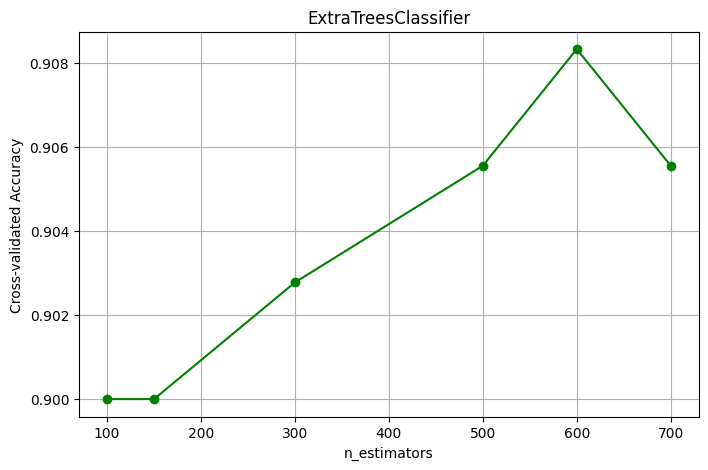

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

n_estimators_r = [100, 150, 300, 500,600,700]
accuracy = []

for i in n_estimators_r:
    extratrees = ExtraTreesClassifier(n_estimators=i, random_state=42)
    pipeline_extratrees = make_pipeline(scaler, extratrees)
    y_pred_extratrees = cross_val_predict(pipeline_extratrees, X, y, cv=kfold)
    acc = accuracy_score(y, y_pred_extratrees)
    accuracy.append(acc)

plt.figure(figsize=(8, 5))
plt.plot(n_estimators_r, accuracy, marker='o', color='green')
plt.title('ExtraTreesClassifier')
plt.xlabel('n_estimators')
plt.ylabel('Cross-validated Accuracy')
plt.grid(True)
plt.show()


# Feature Selection

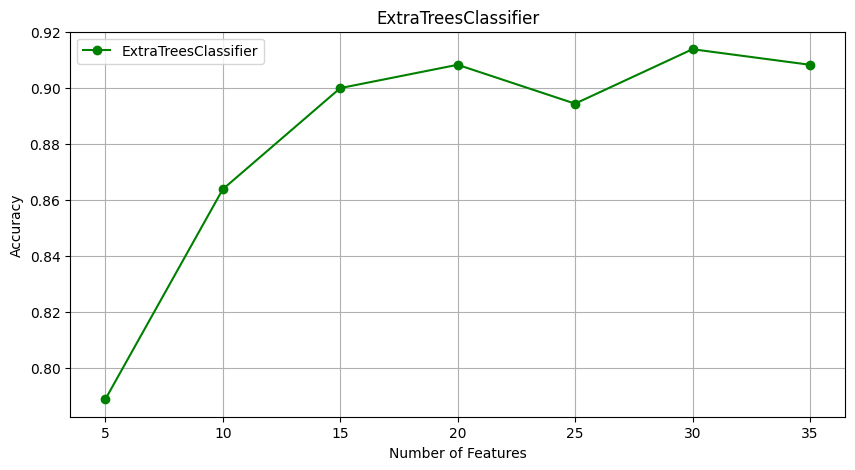

Selected features: ['mean_x', 'std_x', 'mean_y', 'std_y', 'mean_z', 'std_z', 'rms', 'median_x', 'min_x', 'max_x', 'range_x', 'median_y', 'min_y', 'max_y', 'range_y', 'median_z', 'min_z', 'max_z', 'range_z', 'spectral_entropy_x', 'mean_freq_x', 'spectral_entropy_y', 'mean_freq_y', 'spectral_entropy_z', 'mean_freq_z']


In [15]:
k = [5, 10, 15, 20, 25, 30, 35]
accuracy_extratrees = []

for i in k:
    accuracy_fold_et = []
    for train_idx, test_idx in kfold.split(X, y):
        X_train = X.iloc[train_idx]
        X_test = X.iloc[test_idx]
        y_train = y.iloc[train_idx]
        y_test = y.iloc[test_idx]

        scaler = StandardScaler()
        X_train_sc = scaler.fit_transform(X_train)
        X_test_sc = scaler.transform(X_test)

        KBEST = SelectKBest(score_func=f_classif, k=i)
        X_train_selected = KBEST.fit_transform(X_train_sc, y_train)
        X_test_selected = KBEST.transform(X_test_sc)

        et = ExtraTreesClassifier(n_estimators=600, random_state=42)
        et.fit(X_train_selected, y_train)
        accuracy_fold_et.append(et.score(X_test_selected, y_test))

    accuracy_extratrees.append(np.mean(accuracy_fold_et))

plt.figure(figsize=(10, 5))
plt.plot(k, accuracy_extratrees, label='ExtraTreesClassifier', marker='o', color='green')
plt.title('ExtraTreesClassifier')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


best_k = k[np.argmax(accuracy_mlp)]
selector = SelectKBest(score_func=f_classif, k=best_k)
X_sc = StandardScaler().fit_transform(X)
selector.fit(X_sc, y)
mask = selector.get_support()
selected_features = X.columns[mask]
print("Selected features:", selected_features.tolist())


Yes, it is possible to reduce a large number of features, as we can reduce them to 15 features and it would have a performance of 0.90, which is excellent.

# Nested Cross Validation

In [16]:
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

et_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_classif)),
    ('clf', ExtraTreesClassifier(random_state=42))
])

et_param_grid = {
    'select__k': [10, 20, 30,35],
    'clf__n_estimators': [300, 500,600,700],
    'clf__max_depth': [None, 10, 20]
}

et_grid = GridSearchCV(et_pipeline, et_param_grid, cv=inner_cv, scoring='accuracy')
et_nested_scores = cross_val_score(et_grid, X, y, cv=outer_cv, scoring='accuracy')

print("ExtraTreesClassifier nested CV accuracy: %.3f ± %.3f" % (et_nested_scores.mean(), et_nested_scores.std()))


ExtraTreesClassifier nested CV accuracy: 0.908 ± 0.036


# Saving Model

In [17]:
from joblib import dump

final_model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier(n_estimators=100, random_state=42)
)

final_model.fit(X, y)
dump(final_model, 'extra_trees_model_Miguel.pkl')

['extra_trees_model_Miguel.pkl']

In [18]:
from google.colab import files
files.download('extra_trees_model_Miguel.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>